In [25]:
import spacy
import numpy as np
import pandas as pd
import seaborn as sb
import missingno as msn
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as Sia


In [2]:
path_info = 'data/books_data.csv'
path_rating = 'data/Books_rating.csv'


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 30px; text-shadow: 1px 1px black; font-weight: bold"> 1 Construct Features </span>

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.1 Inquire structural integrity </span>


In [3]:
df_info = pd.read_csv(path_info)
df_rating = pd.read_csv(path_rating)


In [4]:
df_info.describe()


,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [5]:
df_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_rating.describe()


,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [7]:
df_rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.2 Enhance data accessibility </span>


In [8]:
df_info = df_info.drop(["image", "previewLink", "publisher", "infoLink"], axis=1)


In [9]:
df_rating = df_rating.drop(["profileName", "review/time", "review/helpfulness", "review/summary"],
                                             axis=1)


In [10]:
df_info.rename(columns={'Title': 'book_title', 'authors': 'book_author', 'publishedDate': 'published_date',
                        'ratingsCount': 'ratings_count'}, inplace=True)


In [11]:
df_rating.rename(columns={'Id': 'book_id', 'Title': 'book_title', 'Price': 'book_price',
                          'User_id': 'user_id', 'review/text': 'review', 'review/score': 'rating'},
                              inplace=True)


In [12]:
df_info.columns


Index(['book_title', 'description', 'book_author', 'published_date',
       'categories', 'ratings_count'],
      dtype='object')

In [13]:
df_rating.columns


Index(['book_id', 'book_title', 'book_price', 'user_id', 'rating', 'review'], dtype='object')

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.3 Fix Structural Issues </span>

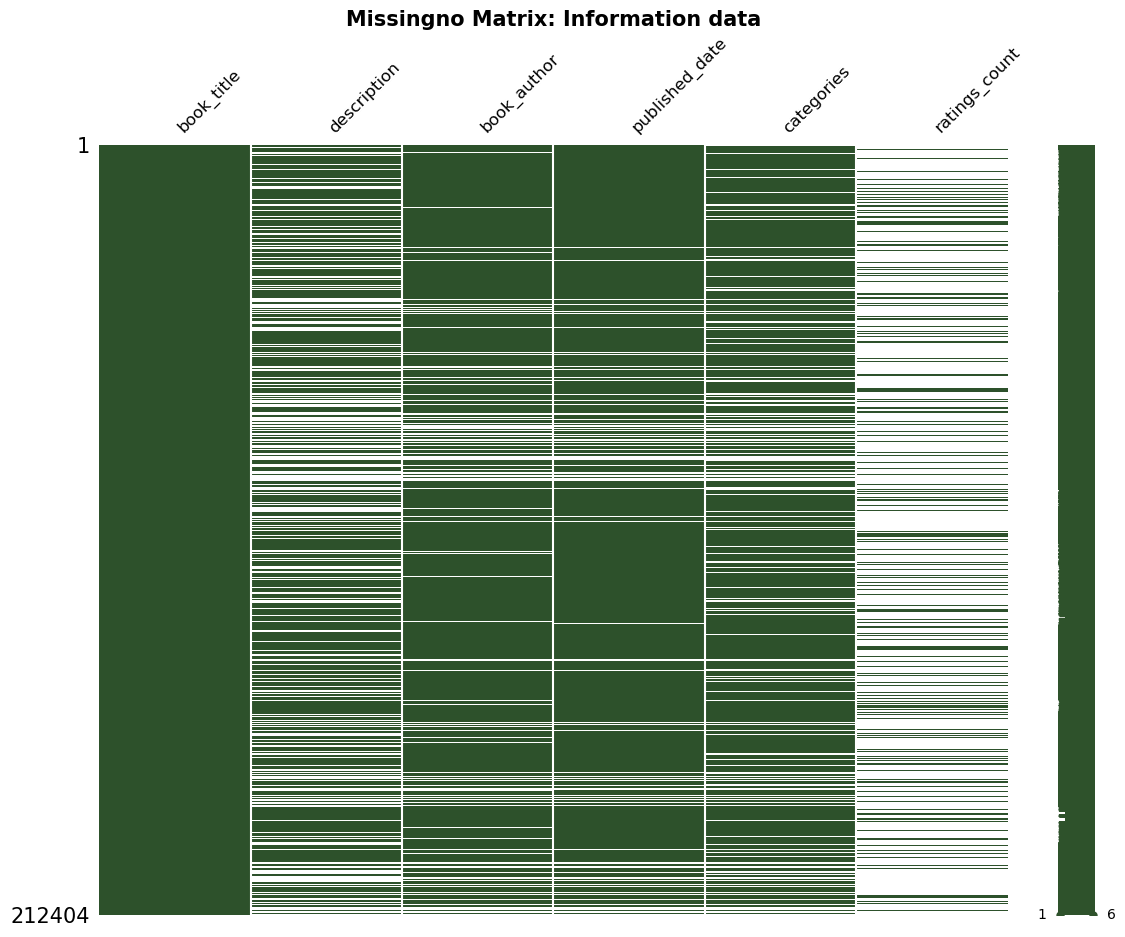

In [14]:
msn.matrix(df_info, color=(0.18, 0.32, 0.17), figsize=[13, 10], fontsize=12)
plt.title("Missingno Matrix: Information data", fontsize=15, fontweight='bold')
plt.show()


In [15]:
df_info.isnull().sum()


book_title             1
description        68442
book_author        31413
published_date     25305
categories         41199
ratings_count     162652
dtype: int64

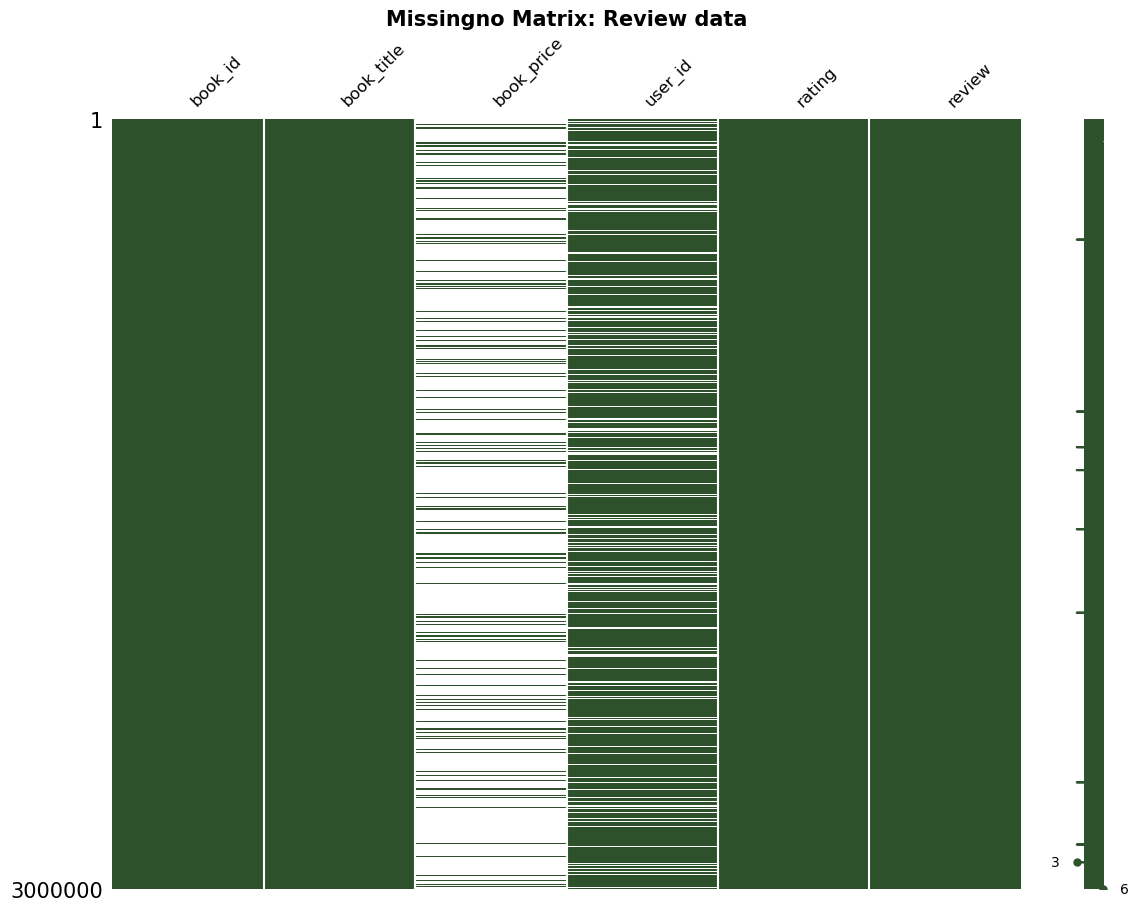

In [16]:
msn.matrix(df_rating, color=(0.18, 0.32, 0.17), figsize=[13, 10], fontsize=12)
plt.title("Missingno Matrix: Review data", fontsize=15, fontweight='bold')
plt.show()


In [17]:
df_rating.isnull().sum()


book_id             0
book_title        208
book_price    2518829
user_id        561787
rating              0
review              8
dtype: int64

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.4 Data cleaning </span>

In [18]:
df_info.columns


Index(['book_title', 'description', 'book_author', 'published_date',
       'categories', 'ratings_count'],
      dtype='object')

In [19]:
df_info.dropna(axis=0, how='any')


,book_title,description,book_author,published_date,categories,ratings_count
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],1996,['Religion'],5.0
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],2012-08-21,['Biography & Autobiography'],1.0
33,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],2018-09-20,['History'],1.0
42,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],2.0
43,Beginner's Yoruba (Hippocrene Beginner's Series),"""Beginner's Yoruba"" is now available with two ...",['Kayode J. Fakinlede'],2005,['Foreign Language Study'],1.0
...,...,...,...,...,...,...
212374,Thin Within,"I want to lose weight, but dieting just doesn'...","['Judy Halliday', 'Arthur Halliday']",2005-04-17,['Health & Fitness'],9.0
212392,The Awakening and Selected Stories (Modern Lib...,"WHEN IT FIRST APPEARED IN 1899, THE AWAKENING ...",['Kate Chopin'],2003,['Adultery'],2.0
212394,Final things,Grace's father believes in science and builds ...,['Jenny Offill'],2015-03-17,['Fiction'],4.0
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],2.0


In [20]:
df_rating.columns


Index(['book_id', 'book_title', 'book_price', 'user_id', 'rating', 'review'], dtype='object')

In [21]:
df_rating.dropna(axis=0, how='any')


,book_id,book_title,book_price,user_id,rating,review
10,0829814000,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,5.0,"I just finished the book, &quot;Wonderful Wors..."
11,0829814000,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,5.0,Many small churches feel like they can not hav...
12,0829814000,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,5.0,I just finished reading this amazing book and ...
13,0829814000,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,5.0,I hadn't been a small church pastor very long ...
14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,1.0,I bought this book because I read some glowing...
...,...,...,...,...,...,...
2999953,0786182431,Very Bad Deaths: Library Edition,90.00,A1EC8SNPR56CLU,4.0,"""Very Bad Death"" is a so so story, but the cha..."
2999954,0786182431,Very Bad Deaths: Library Edition,90.00,A33VKWCAV9QQKC,5.0,Very Bad Deaths was a very great book! Spider ...
2999955,0786182431,Very Bad Deaths: Library Edition,90.00,A2PK3NTC9RMEF4,3.0,Anything by Spider Robinson is worth reading. ...
2999956,0786182431,Very Bad Deaths: Library Edition,90.00,A2D0PY6HIGTYIT,5.0,Great novel! Easy & enjoyable to read straight...


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.5 Find duplicates and perform the De-duplication process </span>

In [22]:
duplicated_cells = 0
check_duplicate = df_rating.duplicated()
check_duplicate


0          False
1          False
2          False
3          False
4          False
           ...  
2999995    False
2999996    False
2999997    False
2999998    False
2999999    False
Length: 3000000, dtype: bool

In [27]:
for row in check_duplicate:
    if row:
        duplicated_cells += 1

duplicated_prc = (duplicated_cells / len(check_duplicate)) * 100
print("• Total Cells:", len(check_duplicate), '\n'
     "• Duplicated Cells:", duplicated_cells,'\n'
     "• Duplicate %:", duplicated_prc)


• Total Cells: 3000000 
• Duplicated Cells: 58834 
• Duplicate %: 1.9611333333333334


In [30]:
data_values = np.array([duplicated_cells, len(df_rating)-duplicated_cells])
explode = [0.2, 0]
labels = ["Duplicate Cells", "Unique Cells"]
title = "Pie Chart: Unique vs Duplicate cells (Pre-processing)"


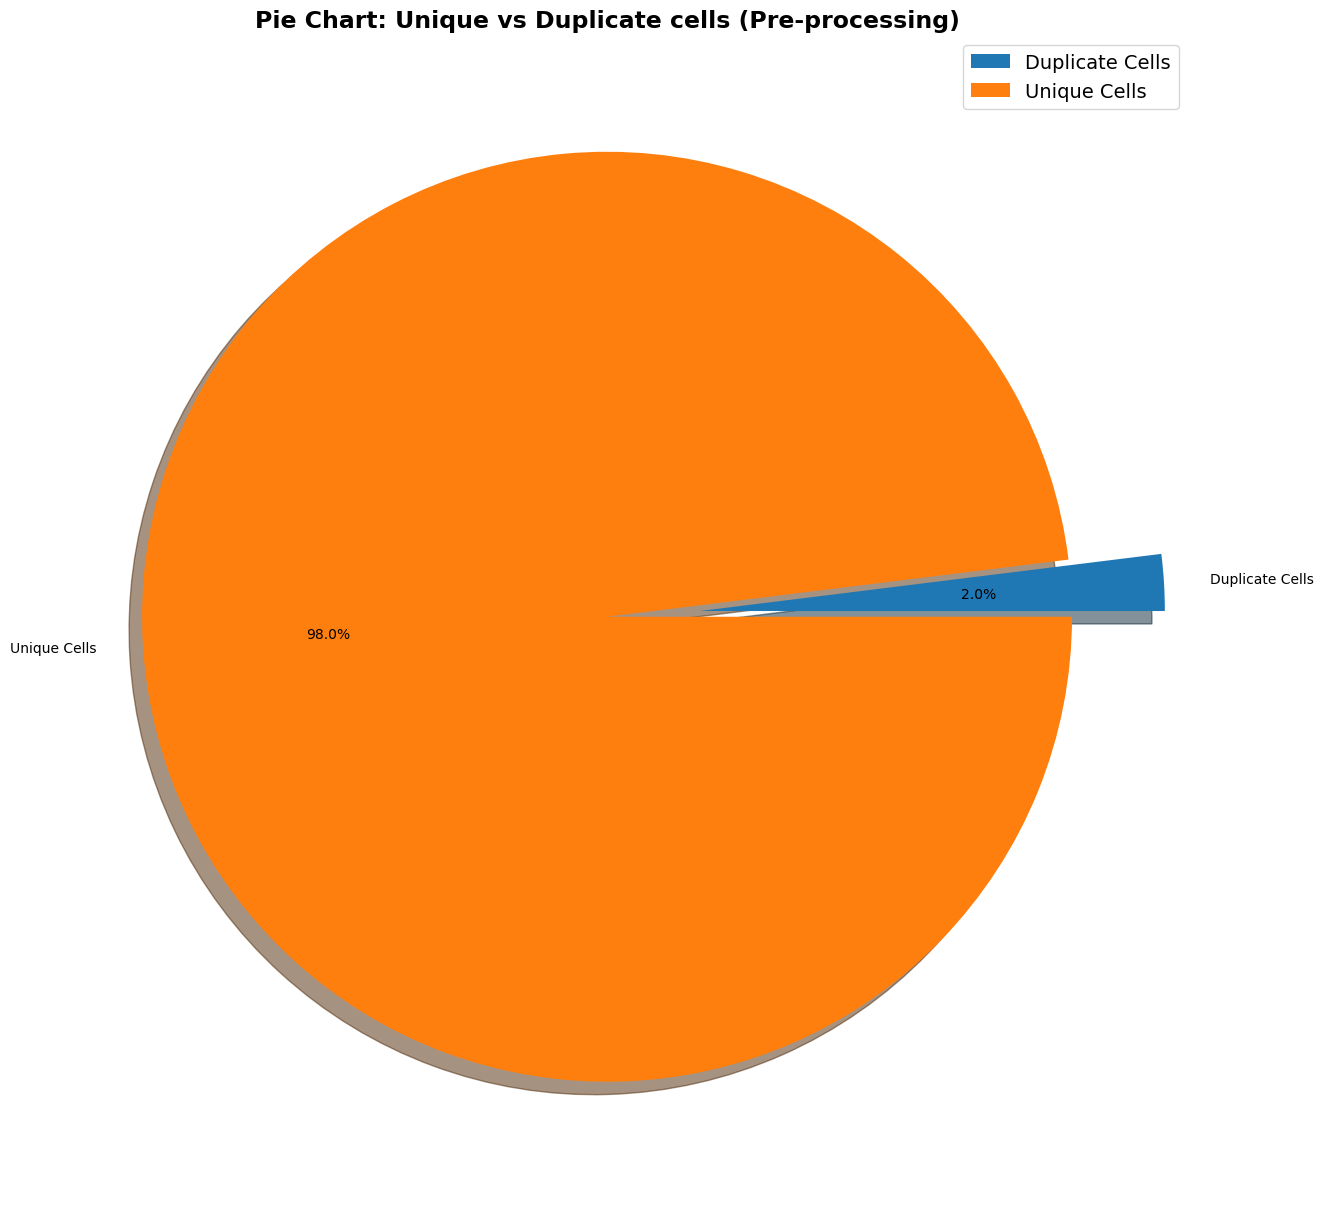

In [32]:
plt.figure(figsize=(15, 20))
plt.pie(data_values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title(title, fontsize=17, fontweight='bold')
plt.axis('off')
plt.legend(fontsize="14", loc="upper right")
plt.show()


In [33]:
df_rating = df_rating.drop_duplicates(subset=None, keep='first', inplace=False,
                                                    ignore_index=False)


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.6 Validate de-duplication </span>

In [34]:
duplicated_cells = 0
check_duplicate = df_rating.duplicated()

for row in check_duplicate:
    if row:
        duplicated_cells += 1

print("• Number of duplicated cells after de-duplication:", duplicated_cells)


• Number of duplicated cells after de-duplication: 0


In [35]:
df_rating.shape


(2970583, 6)

In [36]:
data_values = np.array([duplicated_cells, len(df_rating) - duplicated_cells])
explode = [0.2, 0]
labels = ["Duplicate Cells", "Unique Cells"]
title = "Pie Chart: Unique vs Duplicate cells (Post-processing)"


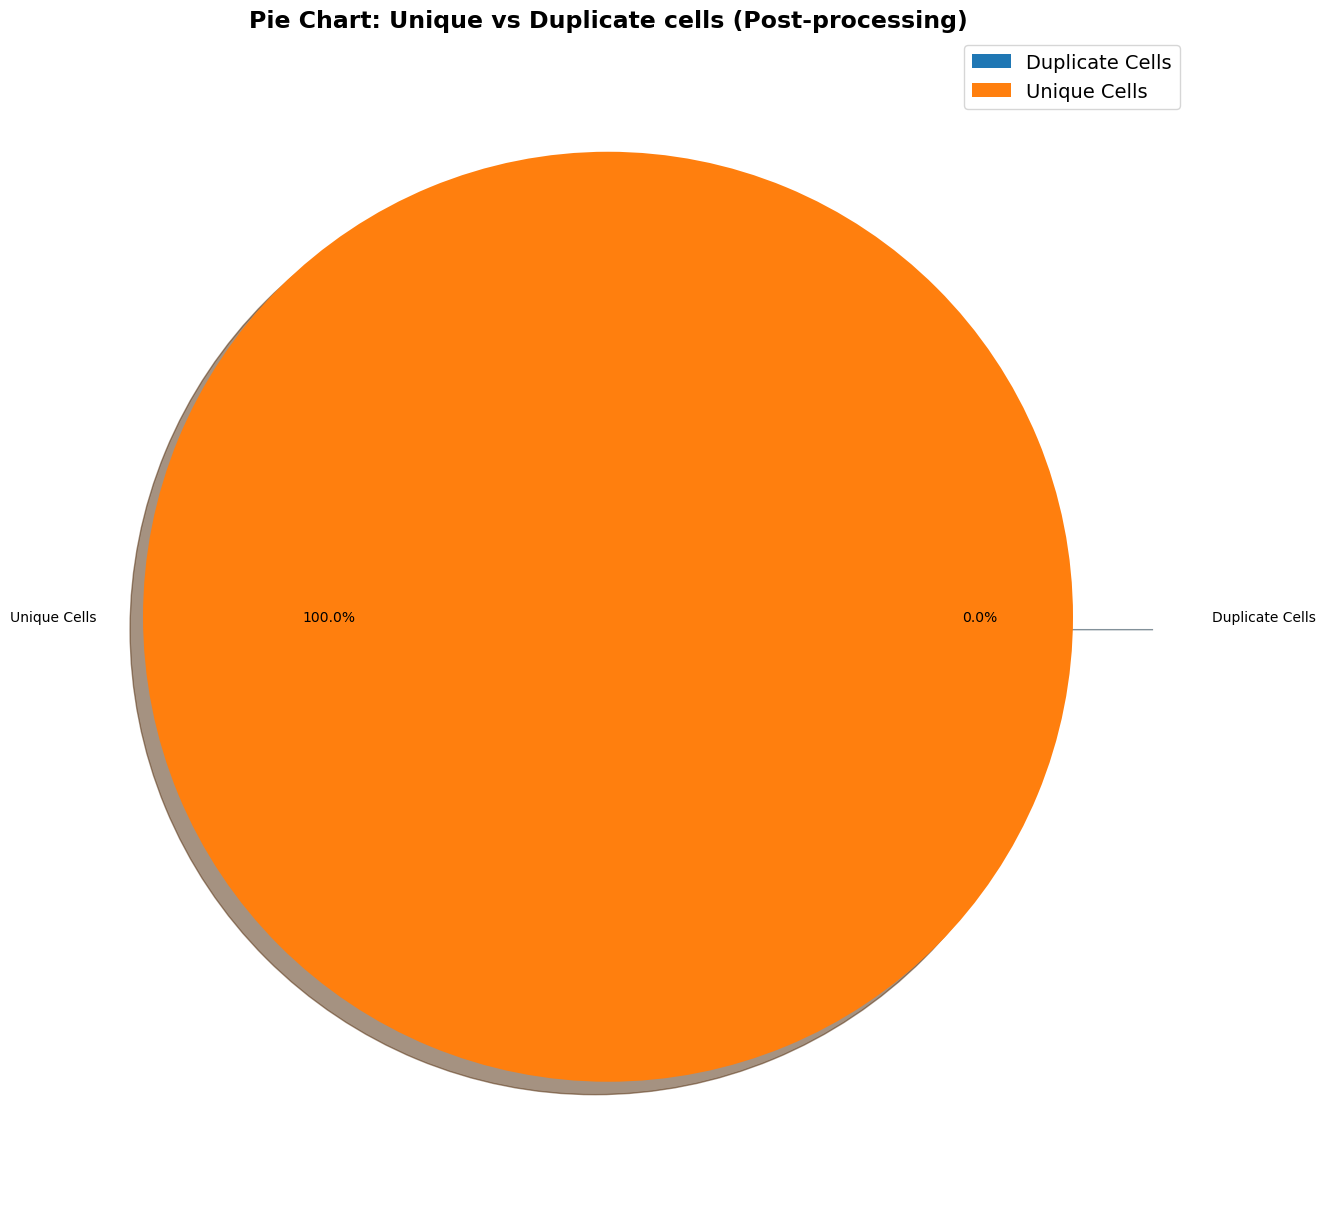

In [37]:
plt.figure(figsize=(15, 20))
plt.pie(data_values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title(title, fontsize=17, fontweight='bold')
plt.axis('off')
plt.legend(fontsize="14", loc="upper right")
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.7 Maintain Feature consistency </span>

In [174]:
year = 0
published_year = []
exception_list = []

for sample in df_info['published_date']:
    try:
        year = sample.split('-')[0]

    except Exception as exc:
        exception_list.append(exc)
        year = sample

    finally:
        published_year.append(year)

df_info['published_year'] = published_year
df_info = df_info.drop(['published_date'], axis=1)

df_info['published_year']


0         1996
1         2005
2         2000
3         2005
4         2003
          ... 
212399    2000
212400    1995
212401    2018
212402    2003
212403    1998
Name: published_year, Length: 212404, dtype: object

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.8 Review Dataframe </span>


In [175]:
df_info.head(20)


,book_title,description,book_author,categories,ratings_count,published_year
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels'],NaN,1996
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,2005
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion'],NaN,2000
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction'],NaN,2005
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,NaN,2003
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,1996
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,NaN,1960
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,3.0,1988
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],['Biography & Autobiography'],NaN,2009
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],['Social Science'],NaN,1995


In [176]:
df_rating.head(20)


,book_id,book_title,book_price,user_id,rating,review
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,5.0,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,5.0,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,5.0,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,4.0,"As far as I am aware, this is the first book-l..."


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 30px; text-shadow: 1px 1px black; font-weight: bold"> 2 Feature Analysis </span>

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.1 Book Prices and Ratings </span>


In [177]:
bins = 15
d1 = df_rating['rating']
d2 = df_rating['book_price']


Text(0.5, 1.0, 'Histogram: Book Prices')

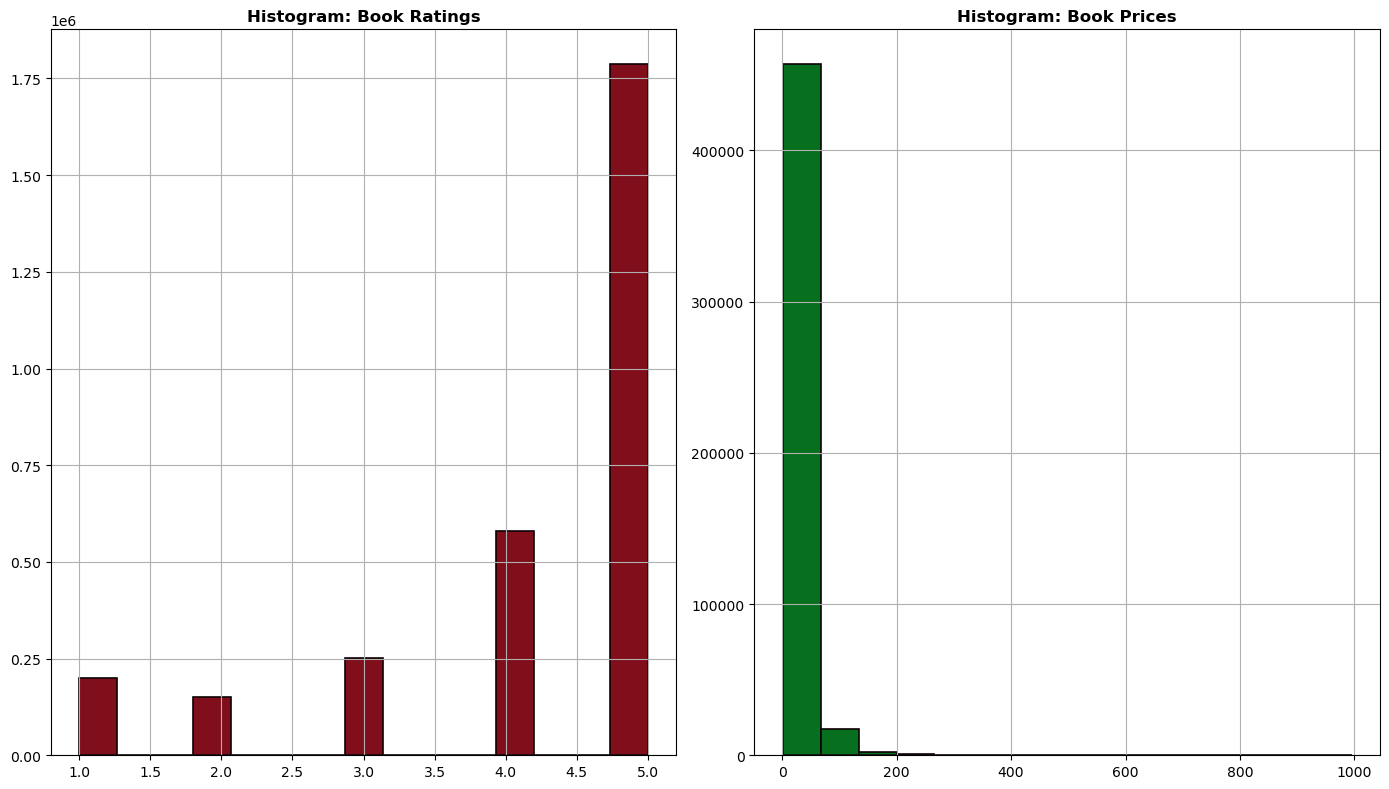

In [233]:
fig, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.autolayout"] = True

d1.hist(bins=bins, color='#800e1b', ax=axes[0], edgecolor='#0d0103', linewidth=1.2)
d2.hist(bins=bins, color='#06701e', ax=axes[1], edgecolor='#0d0103', linewidth=1.2)

axes[0].set_title('Histogram: Book Ratings', fontsize=12, fontweight='bold')
axes[1].set_title('Histogram: Book Prices', fontsize=12, fontweight='bold')


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.2 Density Inspection</span>

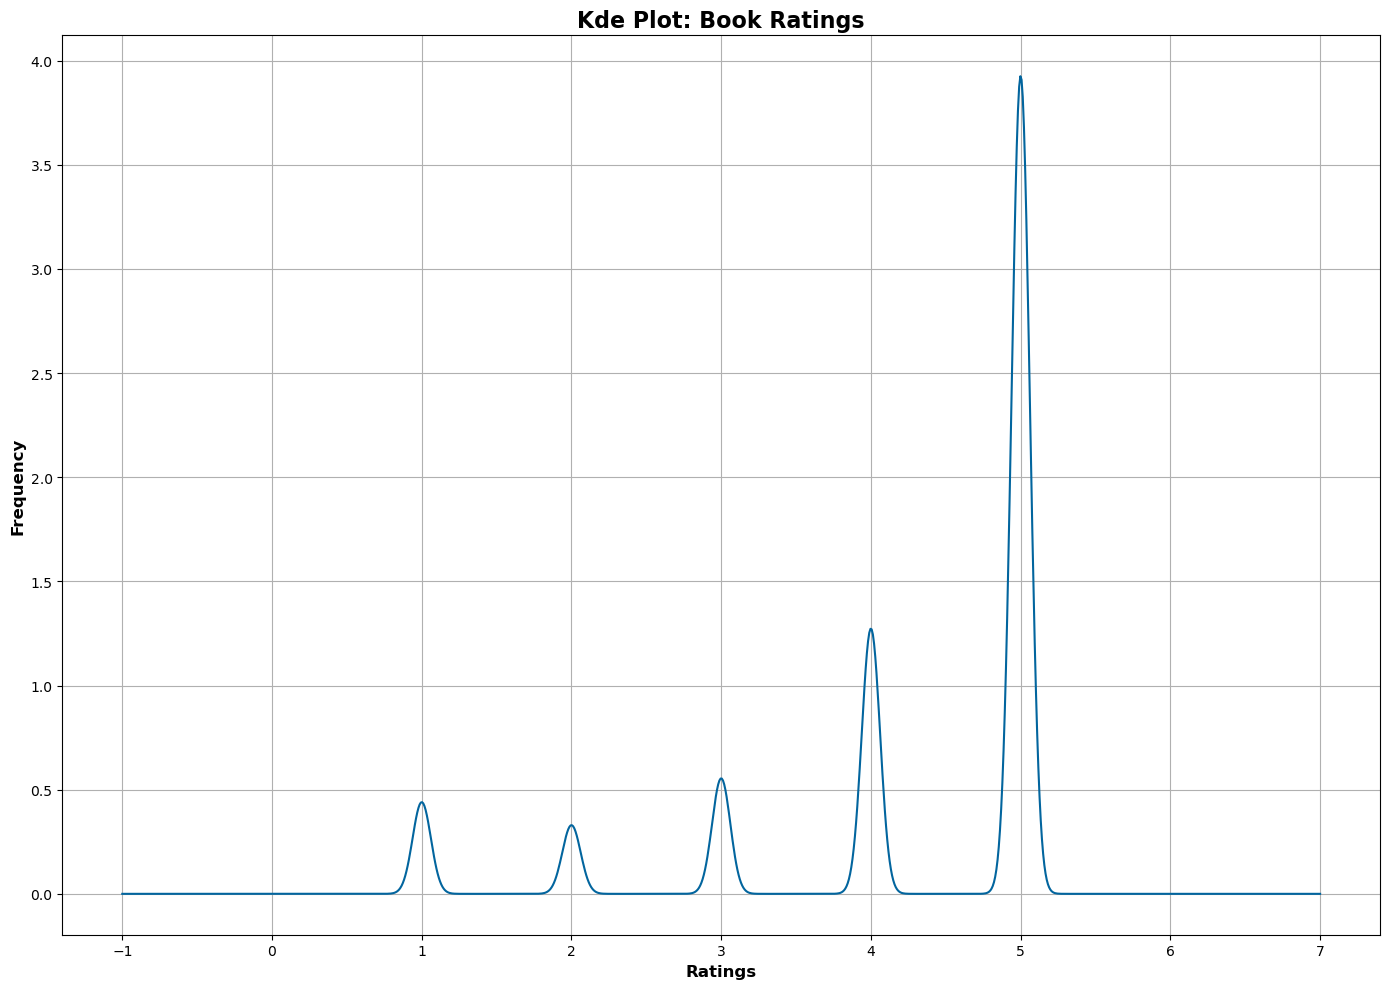

In [216]:
text = "Kde Plot: Book Ratings"
x_label = "Ratings"
y_label = "Frequency"
kind = 'kde'

try:
    df_rating['rating'].plot(kind=kind, figsize=(14, 10), color='#02659e')

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=16, fontweight='bold')
    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(y_label, fontsize=12, fontweight='bold')
    plt.grid()
    plt.show()
    

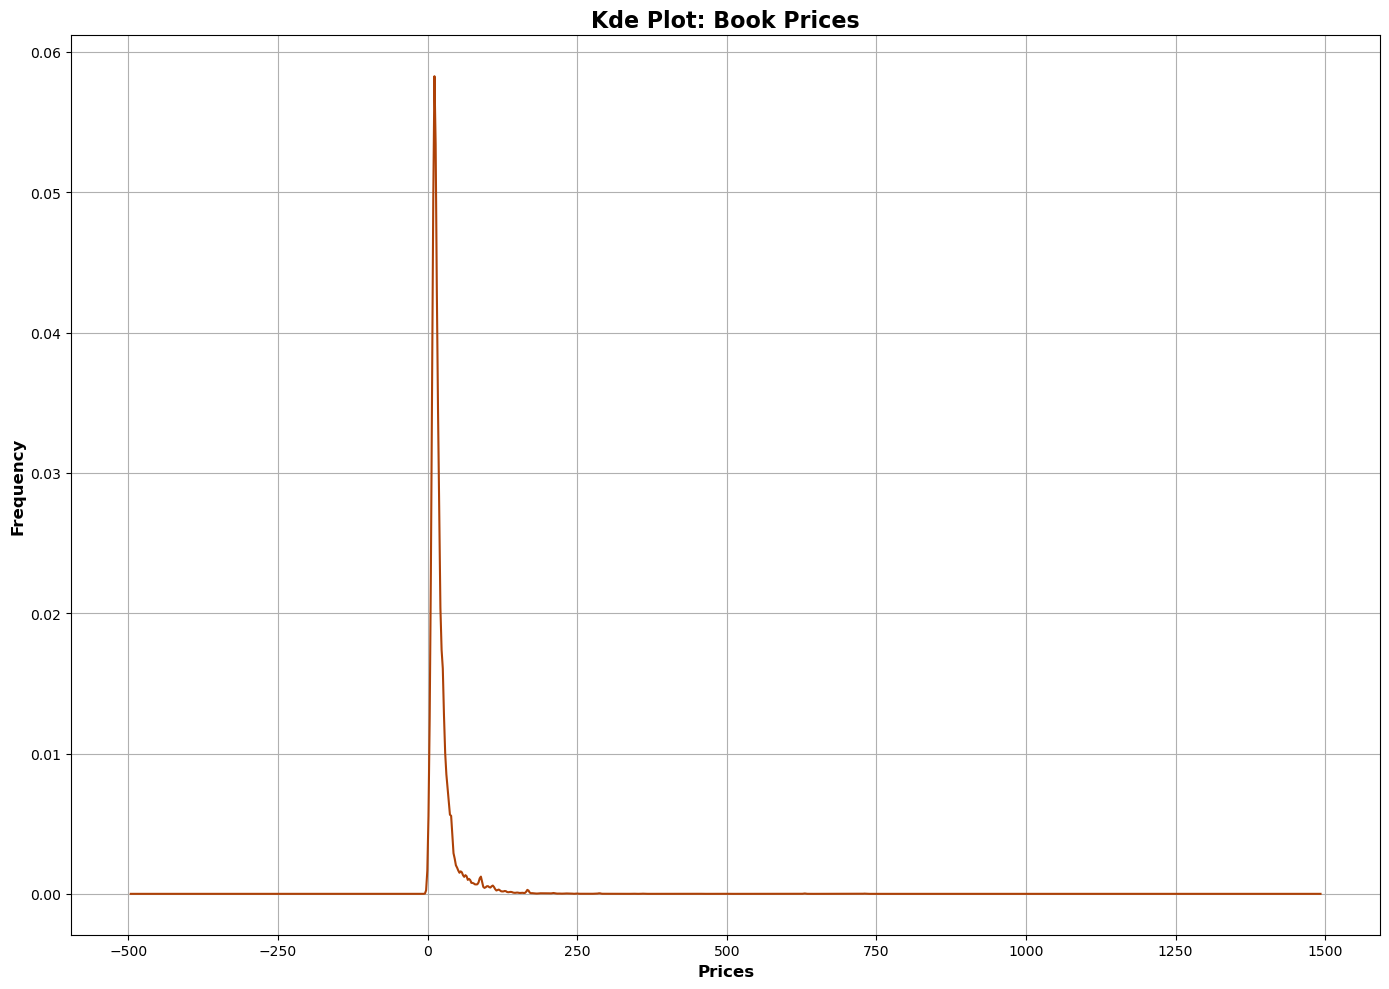

In [217]:
text = "Kde Plot: Book Prices"
x_label = "Prices"
y_label = "Frequency"
kind = 'kde'

try:
    df_rating['book_price'].plot(kind=kind, figsize=(14, 10), color='#ad4107')

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=16, fontweight='bold')
    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(y_label, fontsize=12, fontweight='bold')
    plt.grid()
    plt.show()
    

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.3 Pearson Correlation for Numerical features </span>

In [181]:
df_heatmap = df_rating[['rating', 'book_price']].copy()
df_heatmap.head(15)


,rating,book_price
0,4.0,NaN
1,5.0,NaN
2,5.0,NaN
3,4.0,NaN
4,4.0,NaN
5,4.0,NaN
6,5.0,NaN
7,5.0,NaN
8,5.0,NaN
9,4.0,NaN


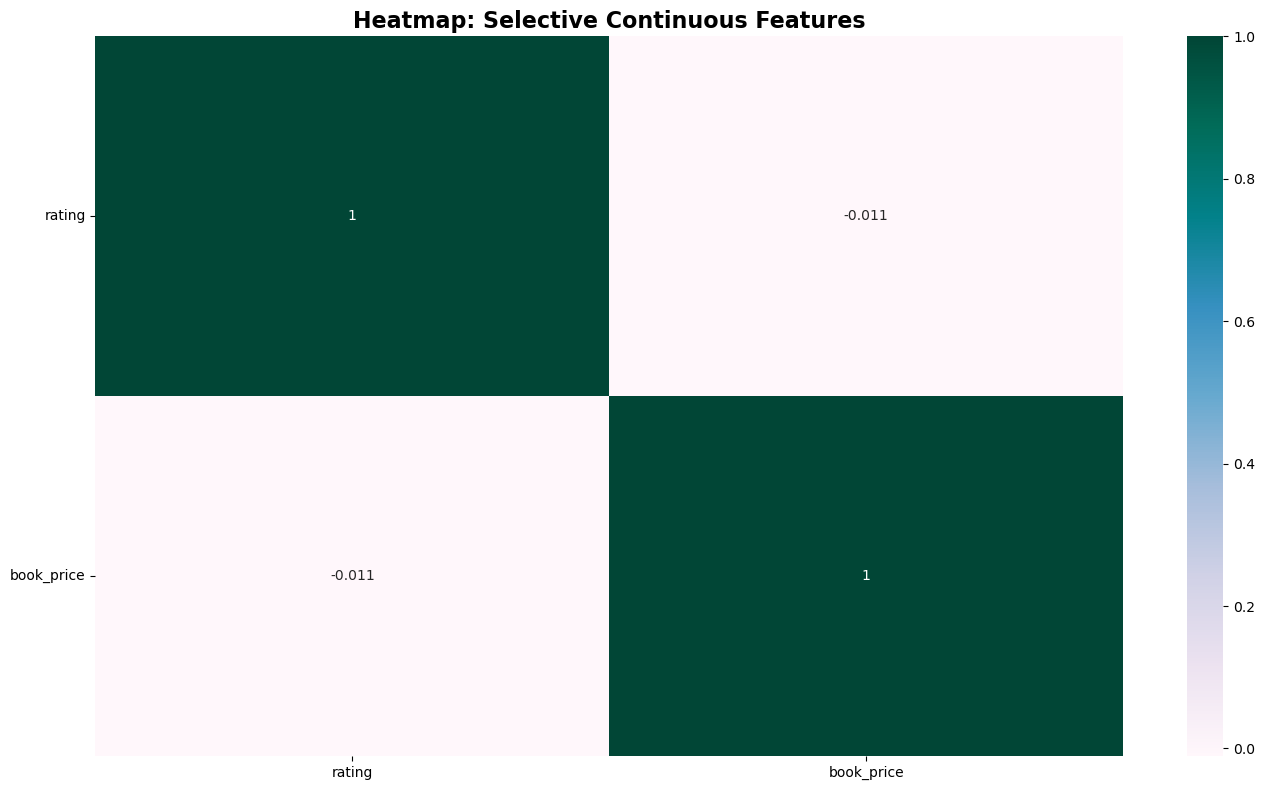

In [182]:
title = "Heatmap: Selective Continuous Features"
data_plot = sb.heatmap(df_heatmap.corr(), cmap="PuBuGn", annot=True)

plt.title(title, fontsize=16, fontweight='bold')
plt.yticks(rotation='horizontal')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.4 Top 10 Book Genres </span>

In [220]:
text = "Pie Distribution: Book Genres"
genre = df_info['categories'].value_counts().sort_values(ascending=False)
genre = genre.head(10)
genre


['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
['Business & Economics']          5625
['Computers']                     4312
['Social Science']                3834
['Juvenile Nonfiction']           3446
['Science']                       2623
Name: categories, dtype: int64

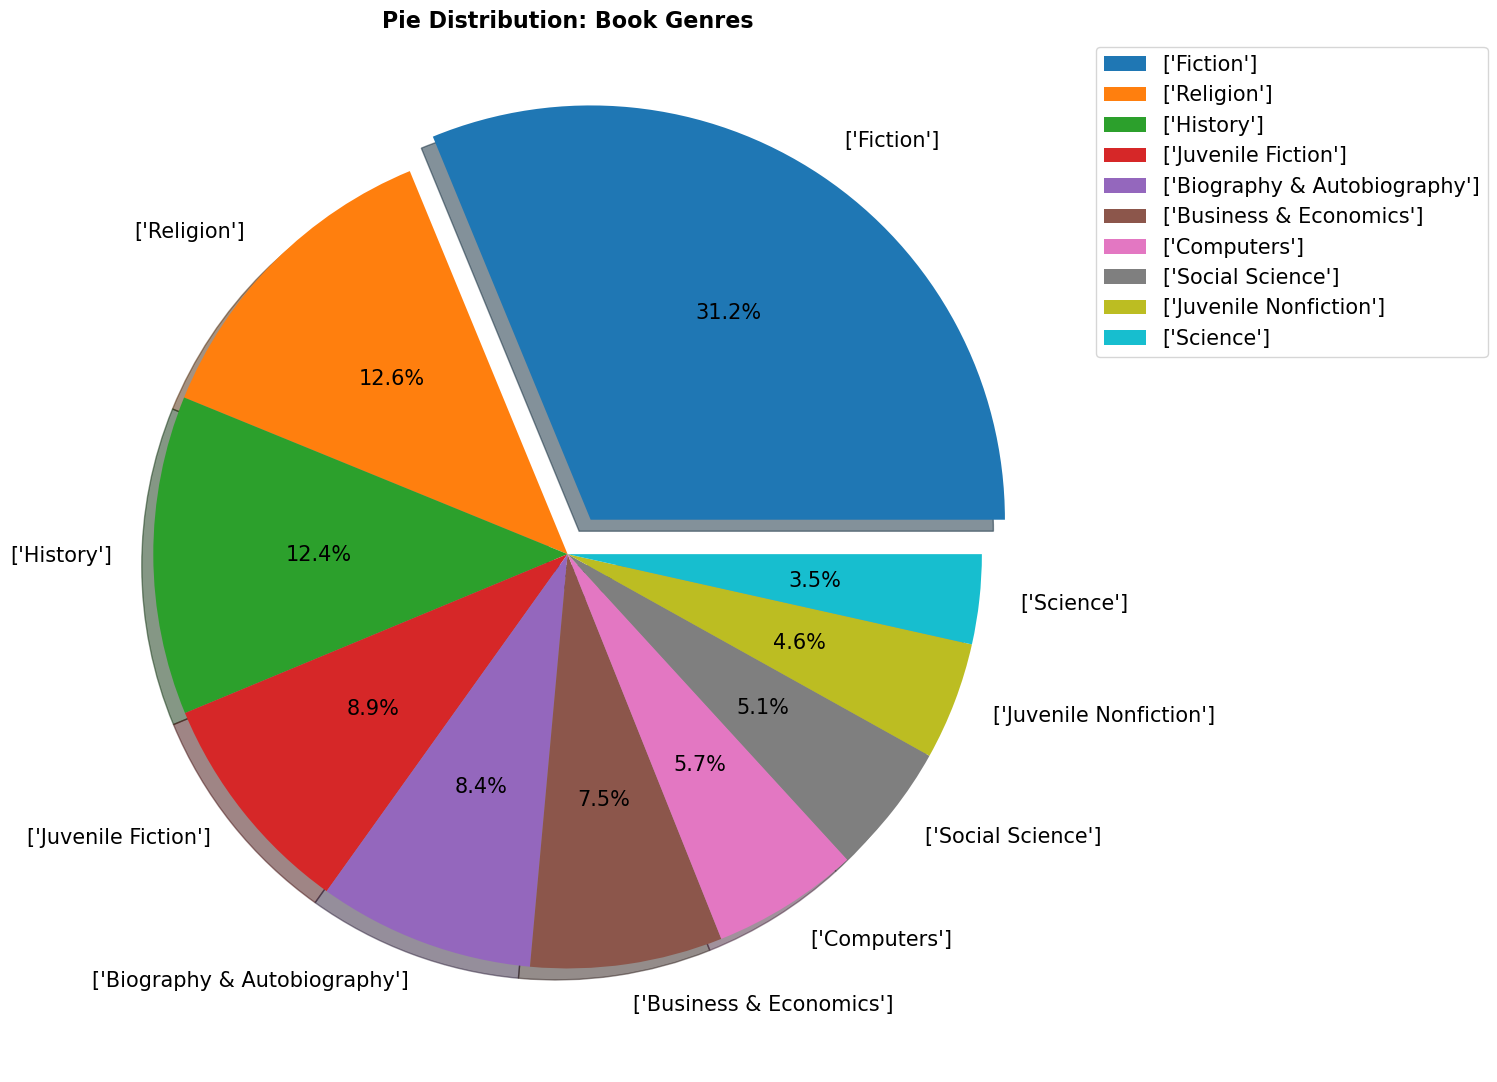

In [221]:
plt.figure(figsize=(15, 20))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = genre.keys().map(str)

try:
    plt.pie(genre, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15})

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=15)
    plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.5 Book Ratings' affect on its Prices </span>

In [185]:
ratings_price = df_rating[['rating', 'book_price']]
ratings_price = ratings_price.sort_values(by=['book_price', 'rating'], ascending=False)
ratings_price


,rating,book_price
1501750,3.0,995.0
1726646,5.0,890.0
1726647,5.0,890.0
799943,5.0,875.0
799944,2.0,875.0
...,...,...
2999824,1.0,NaN
2999922,1.0,NaN
2999923,1.0,NaN
2999926,1.0,NaN


In [218]:
x = df_rating['rating']
y = df_rating['book_price']

text = "Scatter Plot: Ratings and Price"
x_label = 'Ratings'
y_label = 'Book Price'


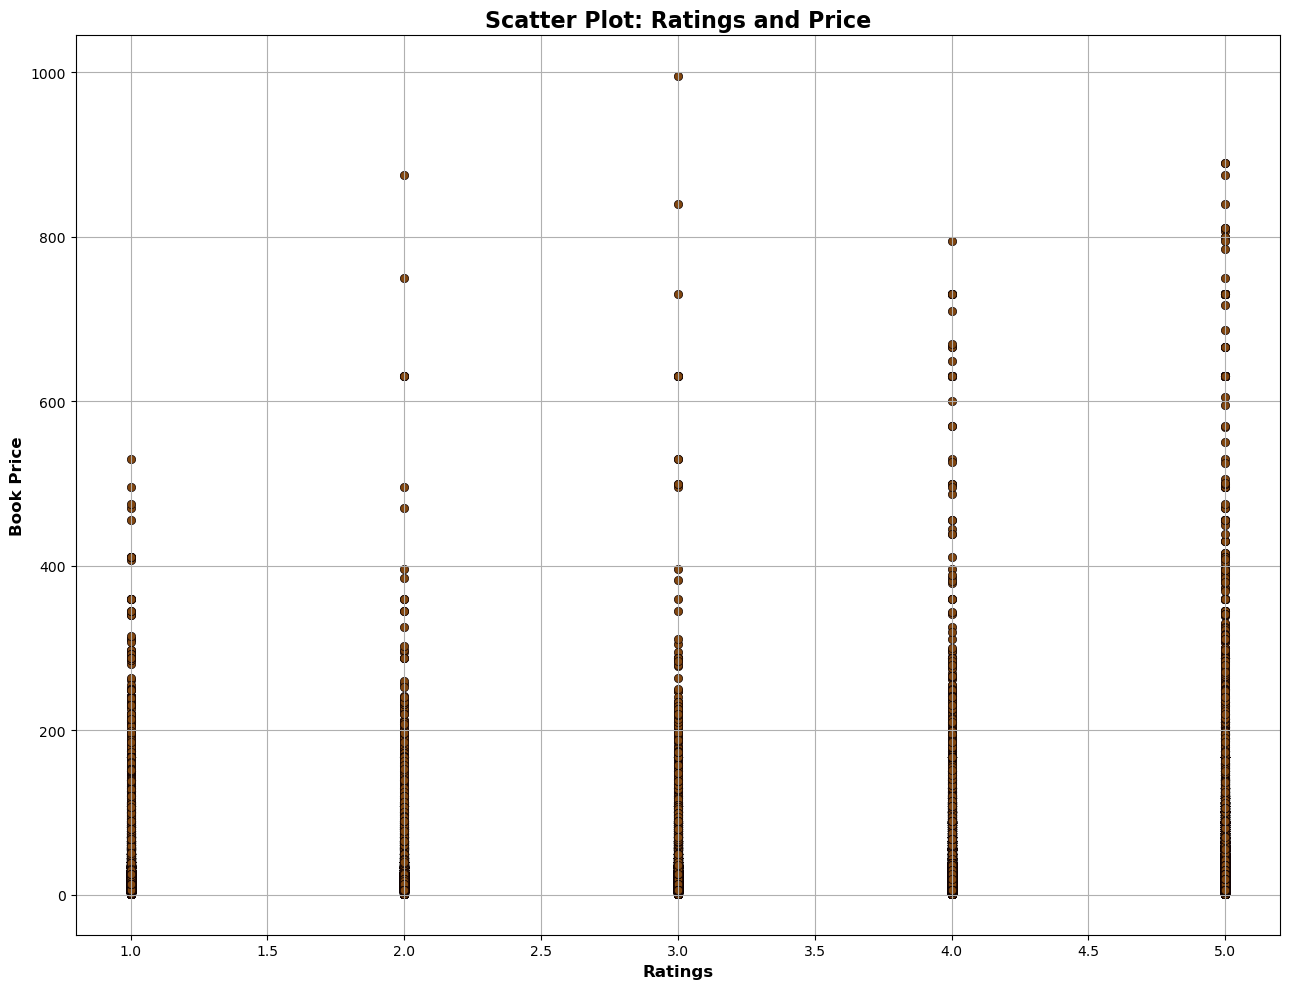

In [219]:
plt.figure(figsize=(13, 10))

try:
    plt.scatter(x, y, c='#80450e', edgecolor='#0d0103', linewidth=0.5)

except Exception as exc:
    print("! ", exc)

finally:
    plt.title(text, fontsize=16, fontweight='bold')
    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(y_label, fontsize=12, fontweight='bold')
    plt.grid()
    plt.show()
    

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.6 Books most purchased </span>

In [188]:
most_purchases = df_rating.groupby('book_title')['user_id'].count().sort_values()
df_temp_rating = most_purchases.to_frame()
df_temp_rating['most_purchases'] = most_purchases
df_temp_rating['most_purchases']


book_title
you can do anything with crepes         0
Future Crime                            0
Russian Literature 1988-19 -OS          0
Russian Names for Russian Dogs          0
Russian Poetry for Intermediates        0
                                    ...  
Great Expectations                   5621
Wuthering Heights                    8480
Atlas Shrugged                      10640
Pride and Prejudice                 17510
The Hobbit                          17689
Name: most_purchases, Length: 212403, dtype: int64

In [189]:
df_arg = df_temp_rating['most_purchases'].sort_values(ascending=False)
df_arg


book_title
The Hobbit                                                                                                                           17689
Pride and Prejudice                                                                                                                  17510
Atlas Shrugged                                                                                                                       10640
Wuthering Heights                                                                                                                     8480
Great Expectations                                                                                                                    5621
                                                                                                                                     ...  
St. Martin's Roget's Thesaurus of English Words and Phrases                                                                              0
Mayflower Famili

In [222]:
text = "Bar Plot: Books most purchased"
x_label = "Purchases"
y_label = "Books"


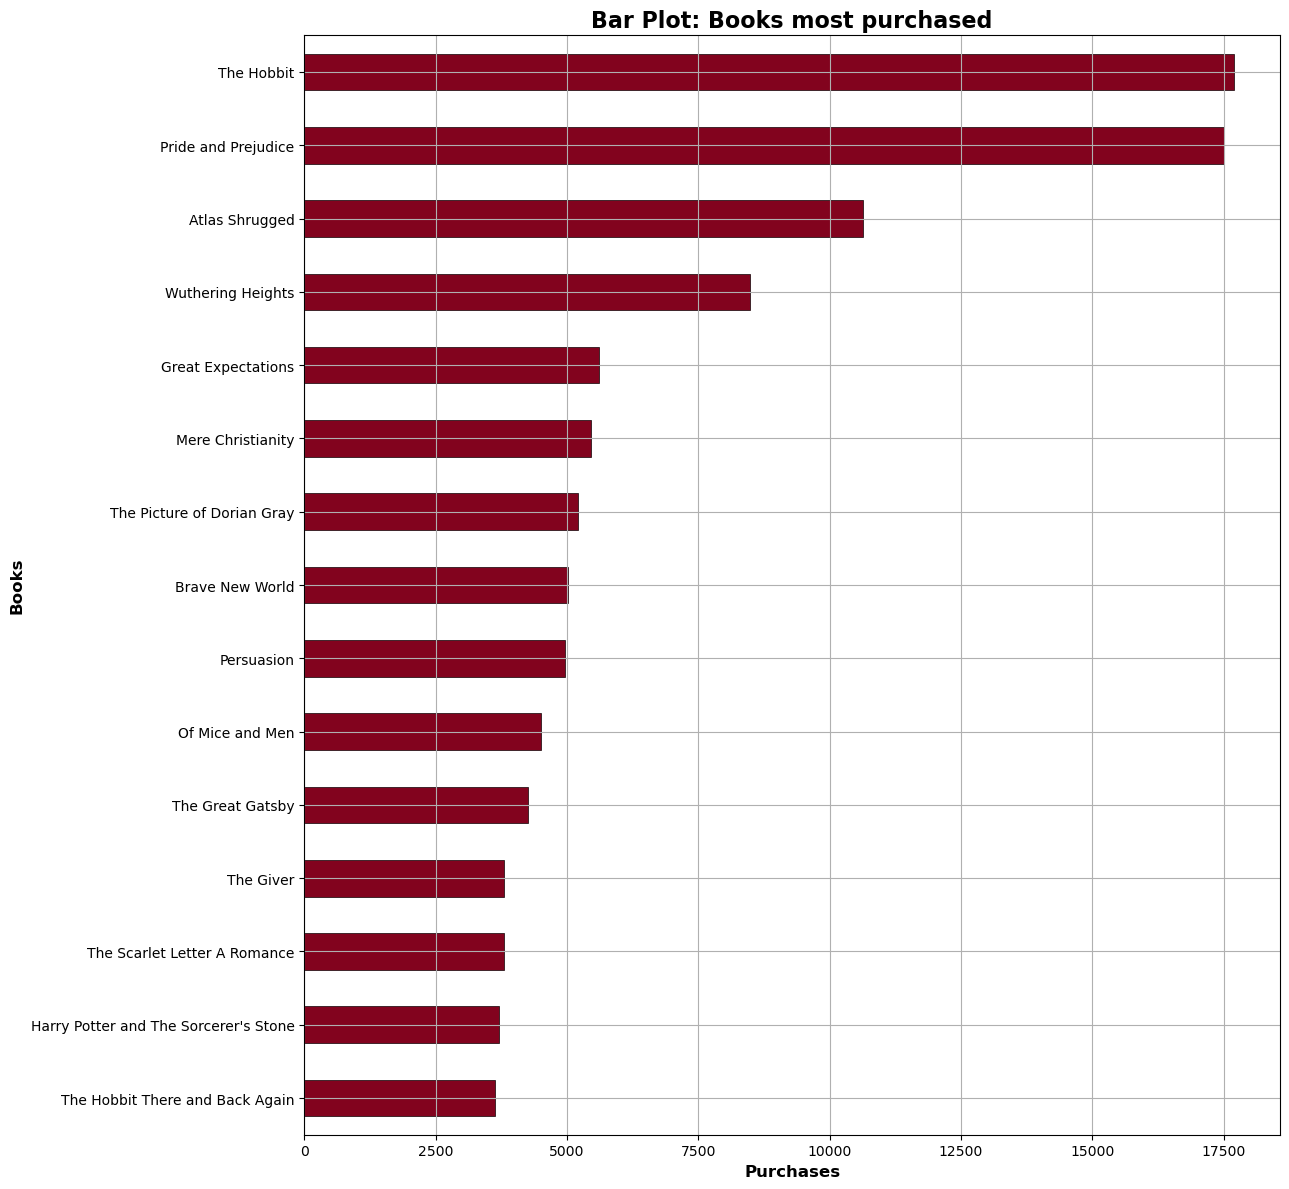

In [223]:
most_purchases[-15:].plot(kind='barh', figsize=(13, 12), color='#82031e', edgecolor='#0d0103', linewidth=0.5)
plt.title(text, fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.grid()
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.7 Highest Mean Rated Books </span>


In [192]:
highest_rated = df_rating.groupby('book_title')['rating'].mean()
df_temp_rating = highest_rated.to_frame()
df_temp_rating['mean_ratings'] = highest_rated
df_temp_rating['mean_ratings']


book_title
" Film technique, " and, " Film acting "                                                                                                   4.500000
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                            5.000000
"... And Poetry is Born ..." Russian Classical Poetry                                                                                      4.000000
"A Titanic hero" Thomas Andrews, shipbuilder                                                                                               4.875000
"A Truthful Impression of the Country": British and American Travel Writing in China, 1880-1949                                            4.000000
                                                                                                                                             ...   
with an everlasting love                                                                             

In [193]:
df_arg = df_temp_rating['mean_ratings'].sort_values(ascending=False)
df_arg


book_title
Emmanuel Levinas (Studies in Philosophy)                                                                 5.0
The Book of Memories (Jewish Latin America)                                                              5.0
Essential Psychopharmacology of Depression and Bipolar Disorder (Essential Psychopharmacology Series)    5.0
Essential Principles of Chiropractic                                                                     5.0
Lectures on conditioned reflexes                                                                         5.0
                                                                                                        ... 
Power-Glide Children's French Activity Book                                                              1.0
Historical and autobiographical sketches of the McMullen family, 1902                                    1.0
Russian Stage 2                                                                                          1.0
Aeroplan

In [225]:
text = "Bar Plot: Highest Rated Books"
x_label = "Ratings"
y_label = "Books"


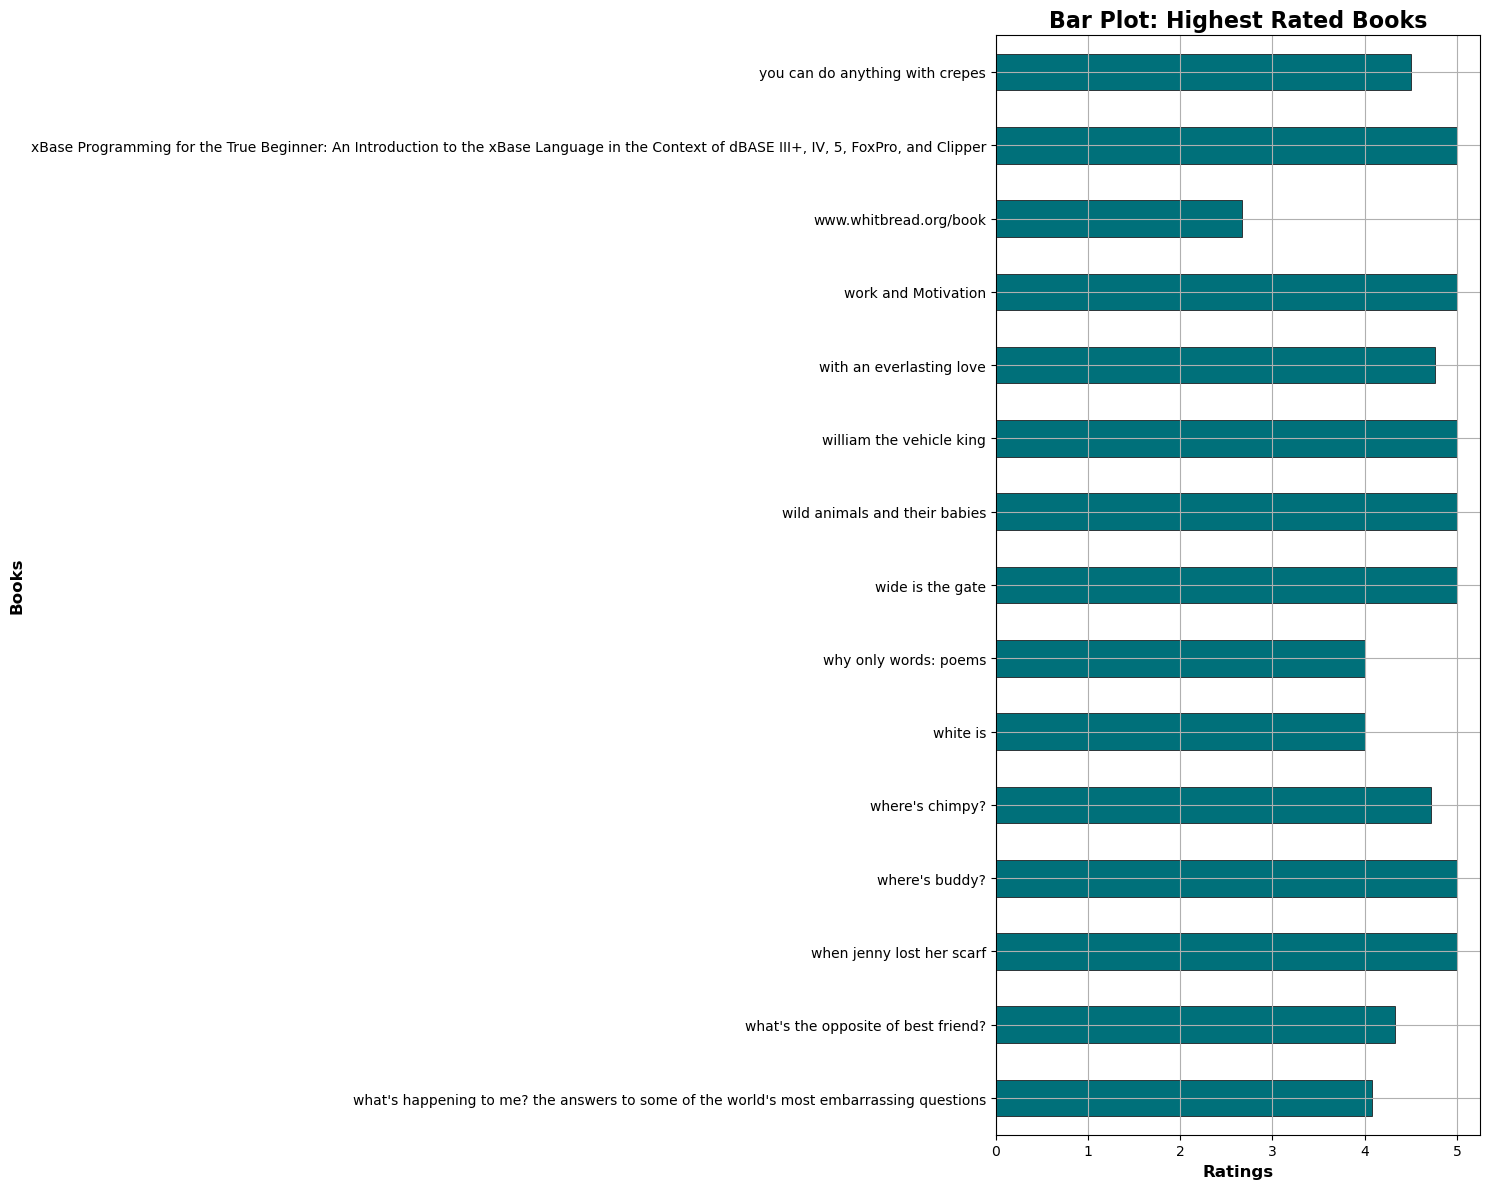

In [226]:
highest_rated[-15:].plot(kind='barh', figsize=(15, 12), color='#00707a', edgecolor='#0d0103', linewidth=0.5)
plt.title(text, fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.grid()
plt.show()



<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.8 Most Expensive Books </span>


In [196]:
expensive_books = df_rating.groupby('book_title')['book_price'].mean()
df_temp_rating = expensive_books.to_frame()
df_temp_rating['mean_price'] = expensive_books
df_temp_rating['mean_price']


book_title
" Film technique, " and, " Film acting "                                                                                                     NaN
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                              NaN
"... And Poetry is Born ..." Russian Classical Poetry                                                                                        NaN
"A Titanic hero" Thomas Andrews, shipbuilder                                                                                                 NaN
"A Truthful Impression of the Country": British and American Travel Writing in China, 1880-1949                                            70.27
                                                                                                                                           ...  
with an everlasting love                                                                                               

In [197]:
df_arg = df_temp_rating['mean_price'].sort_values(ascending=False)
df_arg


book_title
Visual Genetics Plus: Tutorial and Lab Simulations, Site License                                                                           995.0
Advances in Chemical Physics, Volume 119: Modern Nonlinear Optics, Parts 1-3, 2nd Edition                                                  890.0
Youmans Neurological Surgery (Four Volume Set)                                                                                             875.0
Chicago School Pragmatism (History of American Thought)                                                                                    840.0
Leechdoms, Wortcunning and Starcraft                                                                                                       840.0
                                                                                                                                           ...  
william the vehicle king                                                                                               

In [227]:
text = "Distribution Plot: Book Prices"
x_label = "Price Range ($)"
y_label = "Frequency"
kind = 'hist'


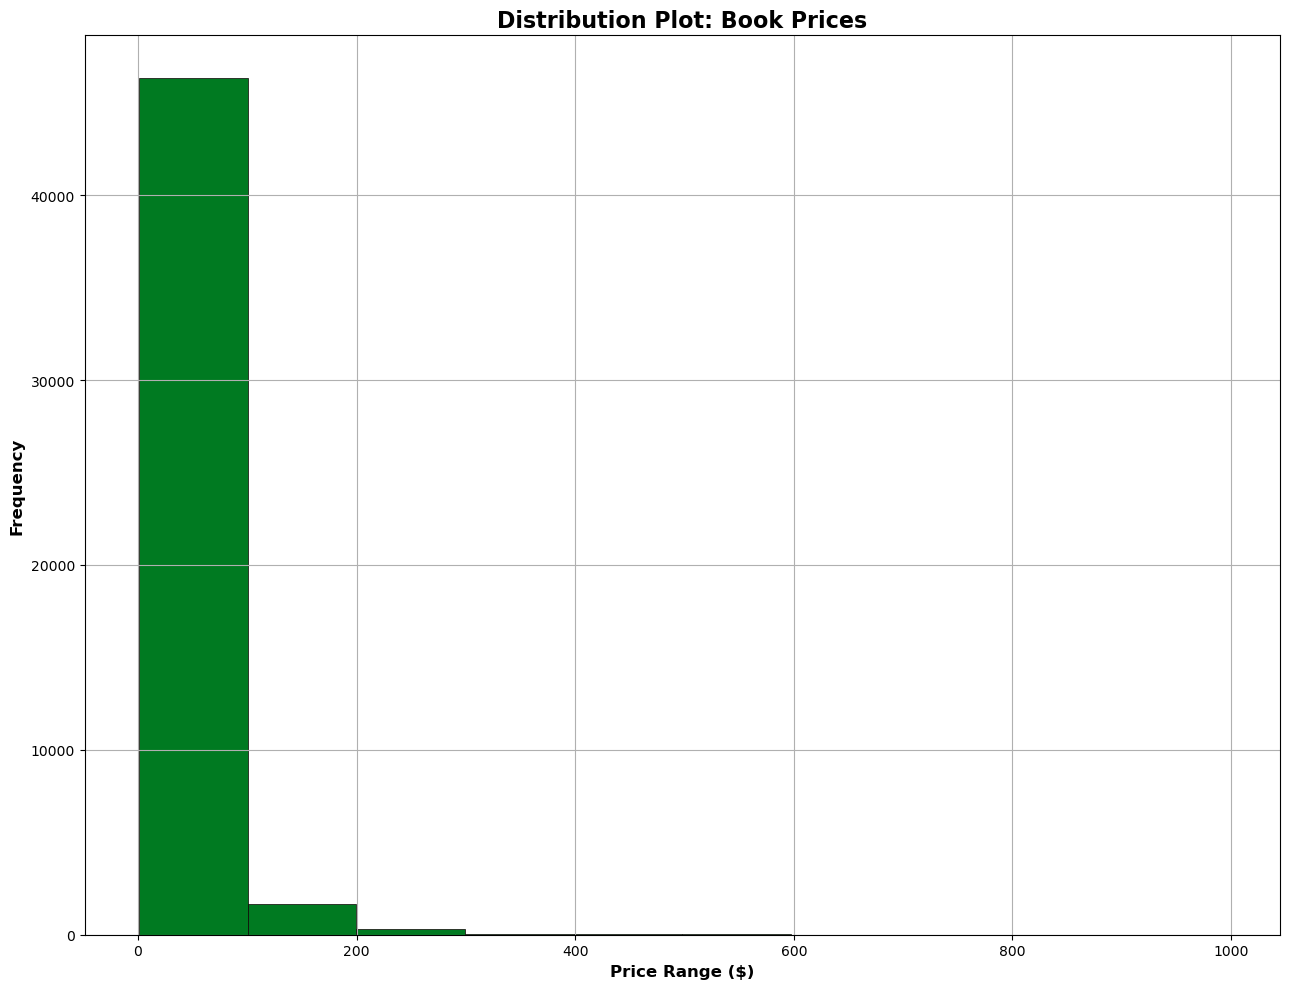

In [228]:
try:
    expensive_books.plot(kind=kind, figsize=(13, 10), color='#007a21', edgecolor='#0d0103', linewidth=0.5)

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=16, fontweight='bold')
    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(y_label, fontsize=12, fontweight='bold')
    plt.grid()
    plt.show()



<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.9 Top Rated Books accumulating over 3500 ratings</span>


In [200]:
accumulated_ratings = df_info[df_info['ratings_count'] > 3500][['book_title', 'ratings_count']]\
            .drop_duplicates()
accumulated_ratings


,book_title,ratings_count
10176,On Fire.,3802.0
12277,The Watchmen,3907.0
16499,The cat in the hat,3638.0
22370,Zen and the Art of Motorcycle Maintenance,3618.0
25239,The Habit of Living,3863.0
26834,The Alchemist,4895.0
28711,A History of the United States,3907.0
31260,Henrietta,4067.0
33680,Red Tent,3656.0
38618,Me Talk Pretty One Day,3638.0


In [201]:
df_arg = accumulated_ratings.sort_values(by=['ratings_count'], ascending=False)
df_arg


,book_title,ratings_count
26834,The Alchemist,4895.0
76345,Unbroken,4572.0
62005,A Mission to Millions; The Story of Ernie Alle...,4572.0
128081,Blue Like Jazz: Nonreligious Thoughts on Chris...,4562.0
57822,Eclipse,4392.0
127021,Redeeming Love,4249.0
112603,A Walk in the Woods,4234.0
162135,The Tipping Point: How Little Things Can Make ...,4218.0
159446,"Travel Light, Eat Heavy Along the Appalachian ...",4161.0
31260,Henrietta,4067.0


<Figure size 1000x1000 with 0 Axes>

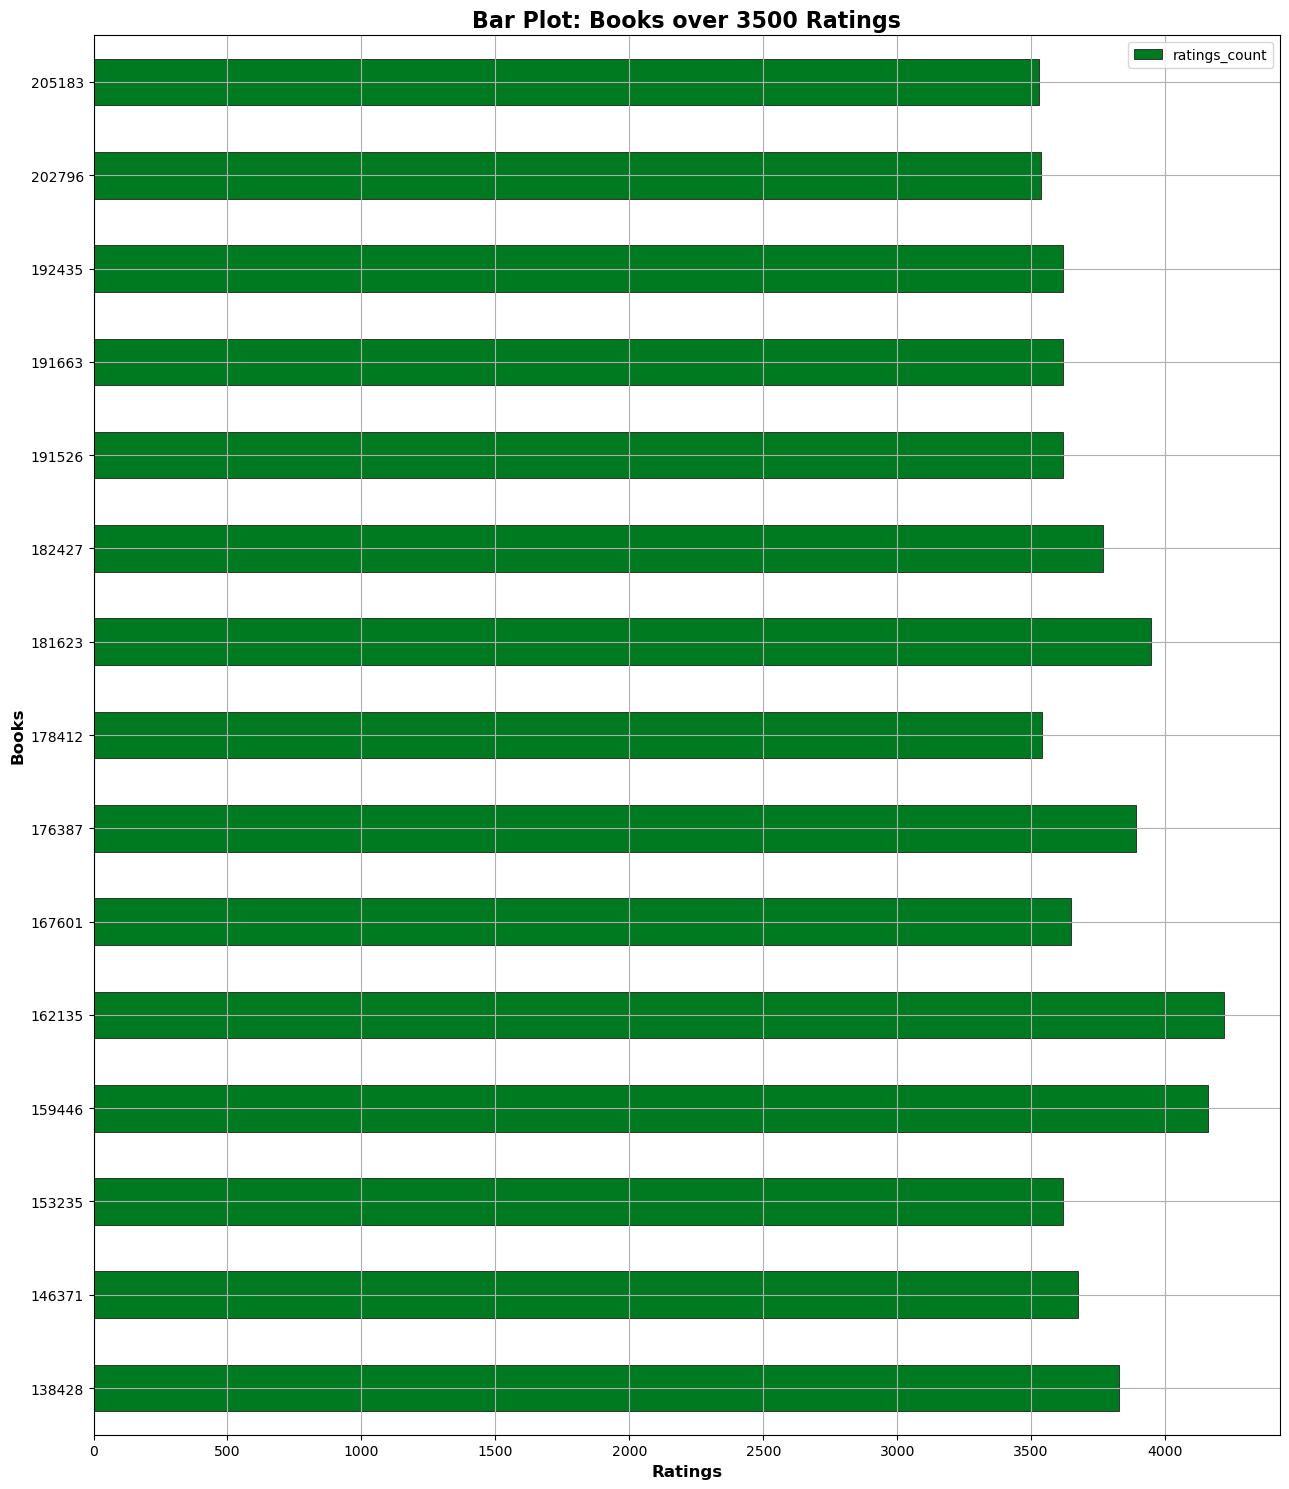

In [229]:
text = "Bar Plot: Books over 3500 Ratings"
x_label = "Ratings"
y_label = "Books"

plt.figure(figsize=(10, 10))
accumulated_ratings[-15:].plot(kind='barh', figsize=(13, 15), color='#007a21', edgecolor='#0d0103', linewidth=0.5)
plt.title(text, fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.grid()
plt.show()



<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.10 Aggregate books for a particular category</span>


In [203]:
category_books = df_info.groupby('categories')['book_title'].count().sort_values()
df_temp_info = category_books.to_frame()
df_temp_info['category_books'] = category_books
df_temp_info['category_books']


categories
["'Abd al-Bah̄a, 1844-1921"]          1
['Homeopathic pharmacy']              1
['Homeopathic pharmacopoeias']        1
['Home']                              1
['Home missions']                     1
                                  ...  
['Biography & Autobiography']      6324
['Juvenile Fiction']               6643
['History']                        9330
['Religion']                       9459
['Fiction']                       23419
Name: category_books, Length: 10883, dtype: int64

In [204]:
df_arg = category_books.sort_values(ascending=False)
df_arg


categories
['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
                                 ...  
['Political scientists']             1
['Political psychology']             1
['Political planning']               1
['Political campaigns']              1
['Abnaki Indians']                   1
Name: book_title, Length: 10883, dtype: int64

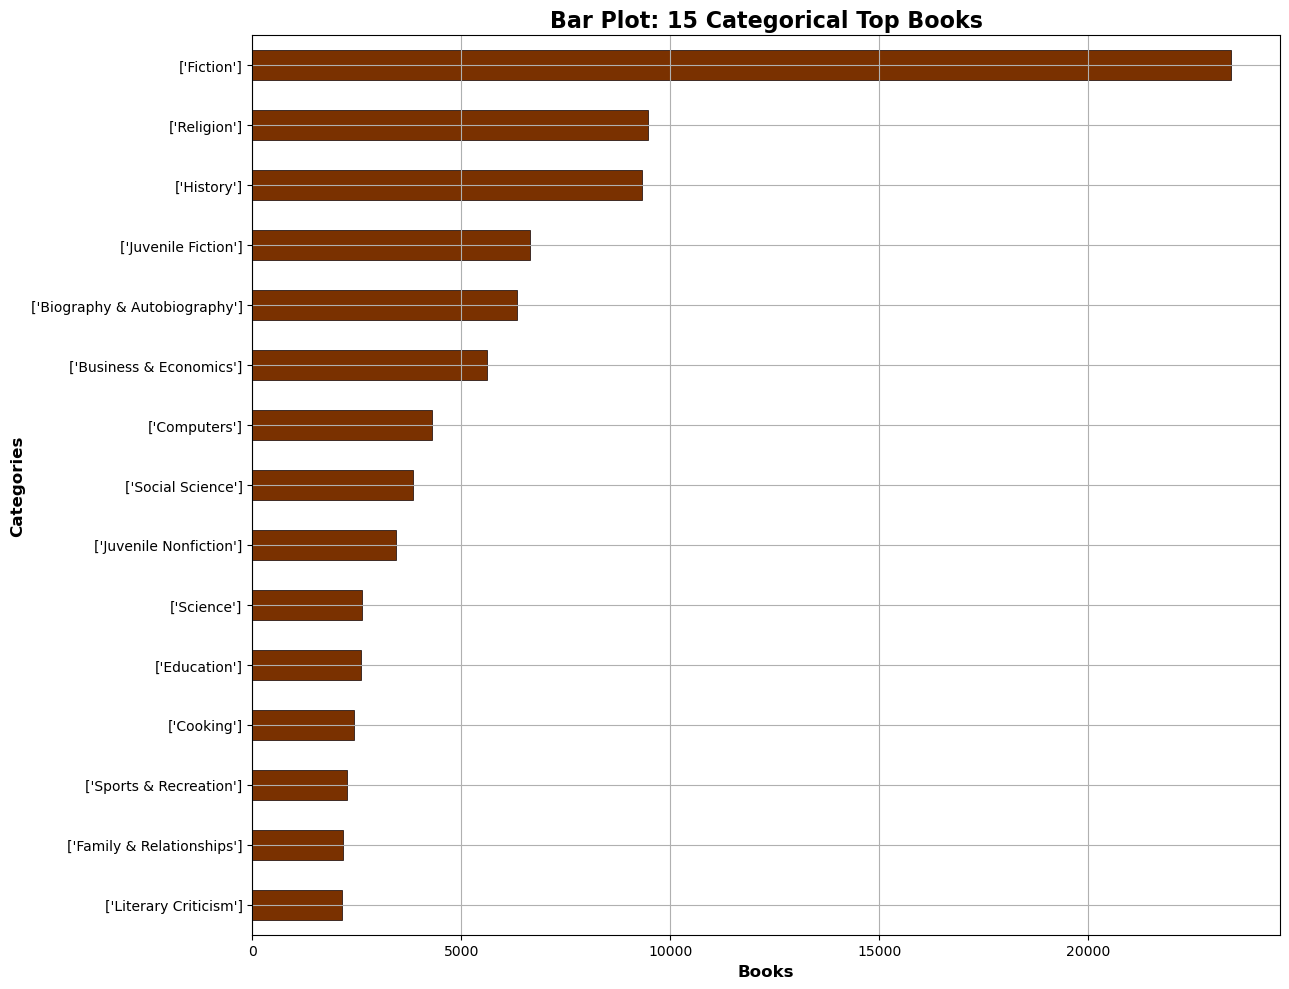

In [230]:
text = "Bar Plot: 15 Categorical Top Books"
x_label = "Books"
y_label = "Categories"

category_books[-15:].plot(kind='barh', figsize=(13, 10), color='#7a3100', edgecolor='#0d0103', linewidth=0.5) 
plt.title(text, fontsize=16, fontweight='bold') 
plt.xlabel(x_label, fontsize=12, fontweight='bold') 
plt.ylabel(y_label, fontsize=12, fontweight='bold') 
plt.grid() 
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.11 Authors with the most published books</span>


In [206]:
author_publish = df_info.groupby('book_author')['book_title'].count().sort_values().sort_values()
df_temp_info = author_publish.to_frame()
df_temp_info['author_publish'] = author_publish
df_temp_info['author_publish']


book_author
['Maharshi Ramana']                                    0
['Dick Quinn', 'Shannon Quinn']                        1
['Dick Raymond', 'Elayne Sears', 'Paul Boisvert']      1
['Dick Raymond', 'Outlet']                             1
['Dick Reavis']                                        1
                                                    ... 
['Erle Stanley Gardner']                             124
['Agatha Christie']                                  142
['Library of Congress. Copyright Office']            178
['William Shakespeare']                              191
['Rose Arny']                                        236
Name: author_publish, Length: 127278, dtype: int64

In [207]:
df_arg = author_publish.sort_values(ascending=False)
df_arg


book_author
['Rose Arny']                                       236
['William Shakespeare']                             191
['Library of Congress. Copyright Office']           178
['Agatha Christie']                                 142
['Erle Stanley Gardner']                            124
                                                   ... 
['Bill Bridges']                                      1
['Bill Bridges', 'Phil Brucato', 'Ethan Skemp']       1
['Bill Bridges', 'Daniel Greenberg', 'Teeuwynn']      1
['Bill Brennan']                                      1
['Maharshi Ramana']                                   0
Name: book_title, Length: 127278, dtype: int64

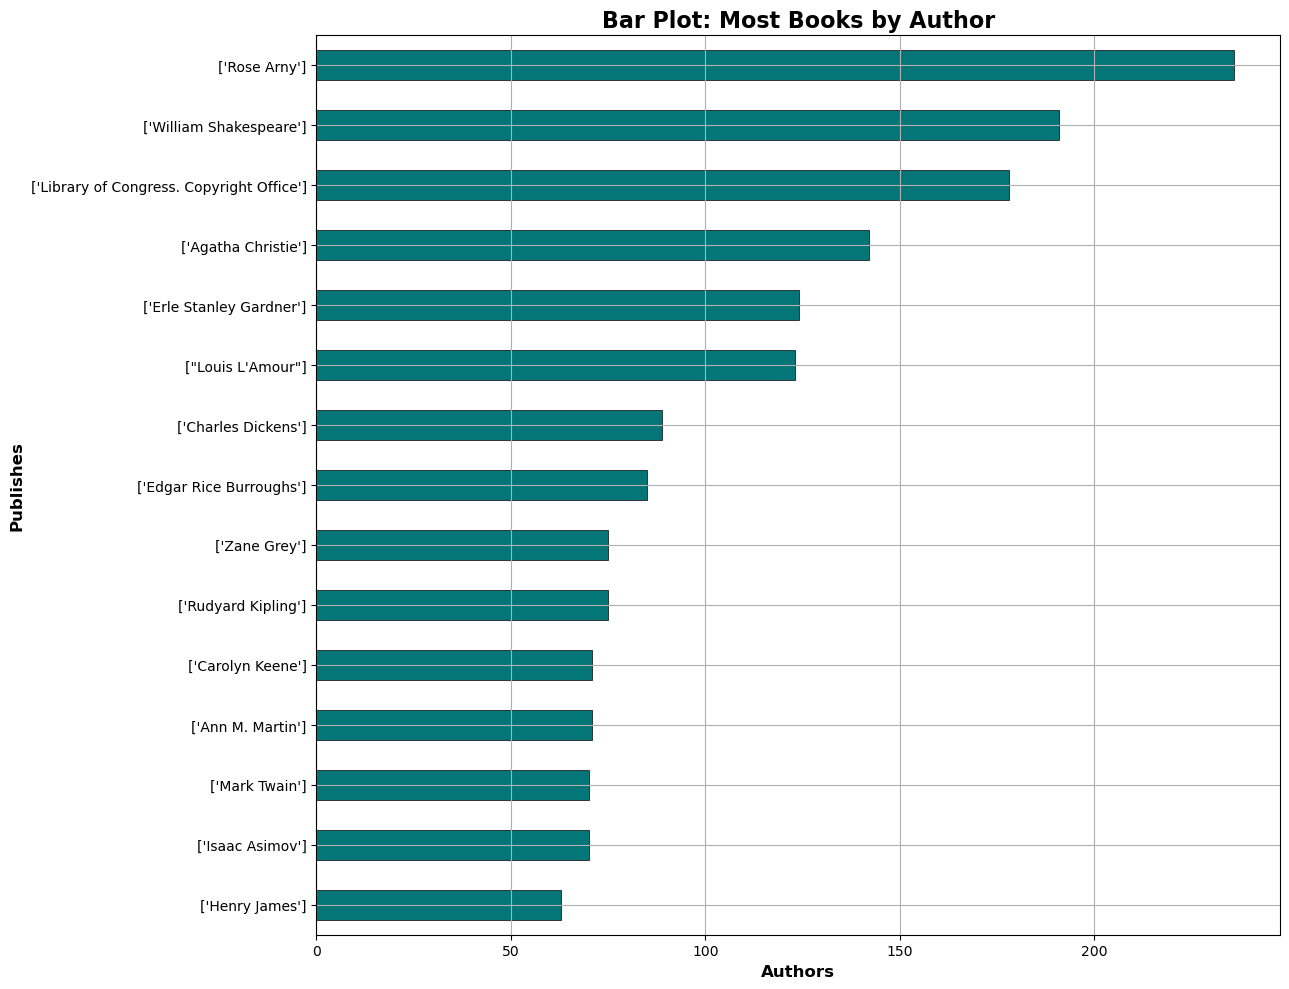

In [231]:
text = "Bar Plot: Most Books by Author"
x_label = "Authors"
y_label = "Publishes"

author_publish[-15:].plot(kind='barh', figsize=(13, 10), color='#047678', edgecolor='#0d0103', linewidth=0.5) 
plt.title(text, fontsize=16, fontweight='bold') 
plt.xlabel(x_label, fontsize=12, fontweight='bold') 
plt.ylabel(y_label, fontsize=12, fontweight='bold') 
plt.grid() 
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.12 Most Active Years for authors</span>


In [209]:
author_years = df_info.groupby('book_author')['published_year'].nunique()
df_temp_info = author_years.to_frame()
df_temp_info['author_years'] = author_years
df_temp_info['author_years']


book_author
["'Abd al-Samih Abu 'Umar"]                                                           1
["'Annah Sobelman"]                                                                   1
["'Jig rten mgon po (('Bri gung chos rje ;)", 'Khenpo Rinpochay Könchok Gyaltsen']    1
["A'isha Ajayi"]                                                                      1
["A. H. Gebhard-L'Estrange"]                                                          1
                                                                                     ..
['생명의말씀사편집부']                                                                         1
['알렉상드르 뒤마(Alexandre Dumas)']                                                         1
['임병균외']                                                                              1
['편집부']                                                                               3
['편집부편']                                                                              1
Name: author_years, 

In [210]:
df_arg = author_years.sort_values(ascending=False)
df_arg


book_author
['William Shakespeare']                      81
['Erle Stanley Gardner']                     51
['Charles Dickens']                          48
['Mark Twain']                               44
['Library of Congress. Copyright Office']    43
                                             ..
['William Sheehan']                           0
['Anne Argula']                               0
['Barrowsm Spencer Houghton']                 0
['Adam Pfaff']                                0
['Kathleen Sue Fine-Dare']                    0
Name: published_year, Length: 127278, dtype: int64

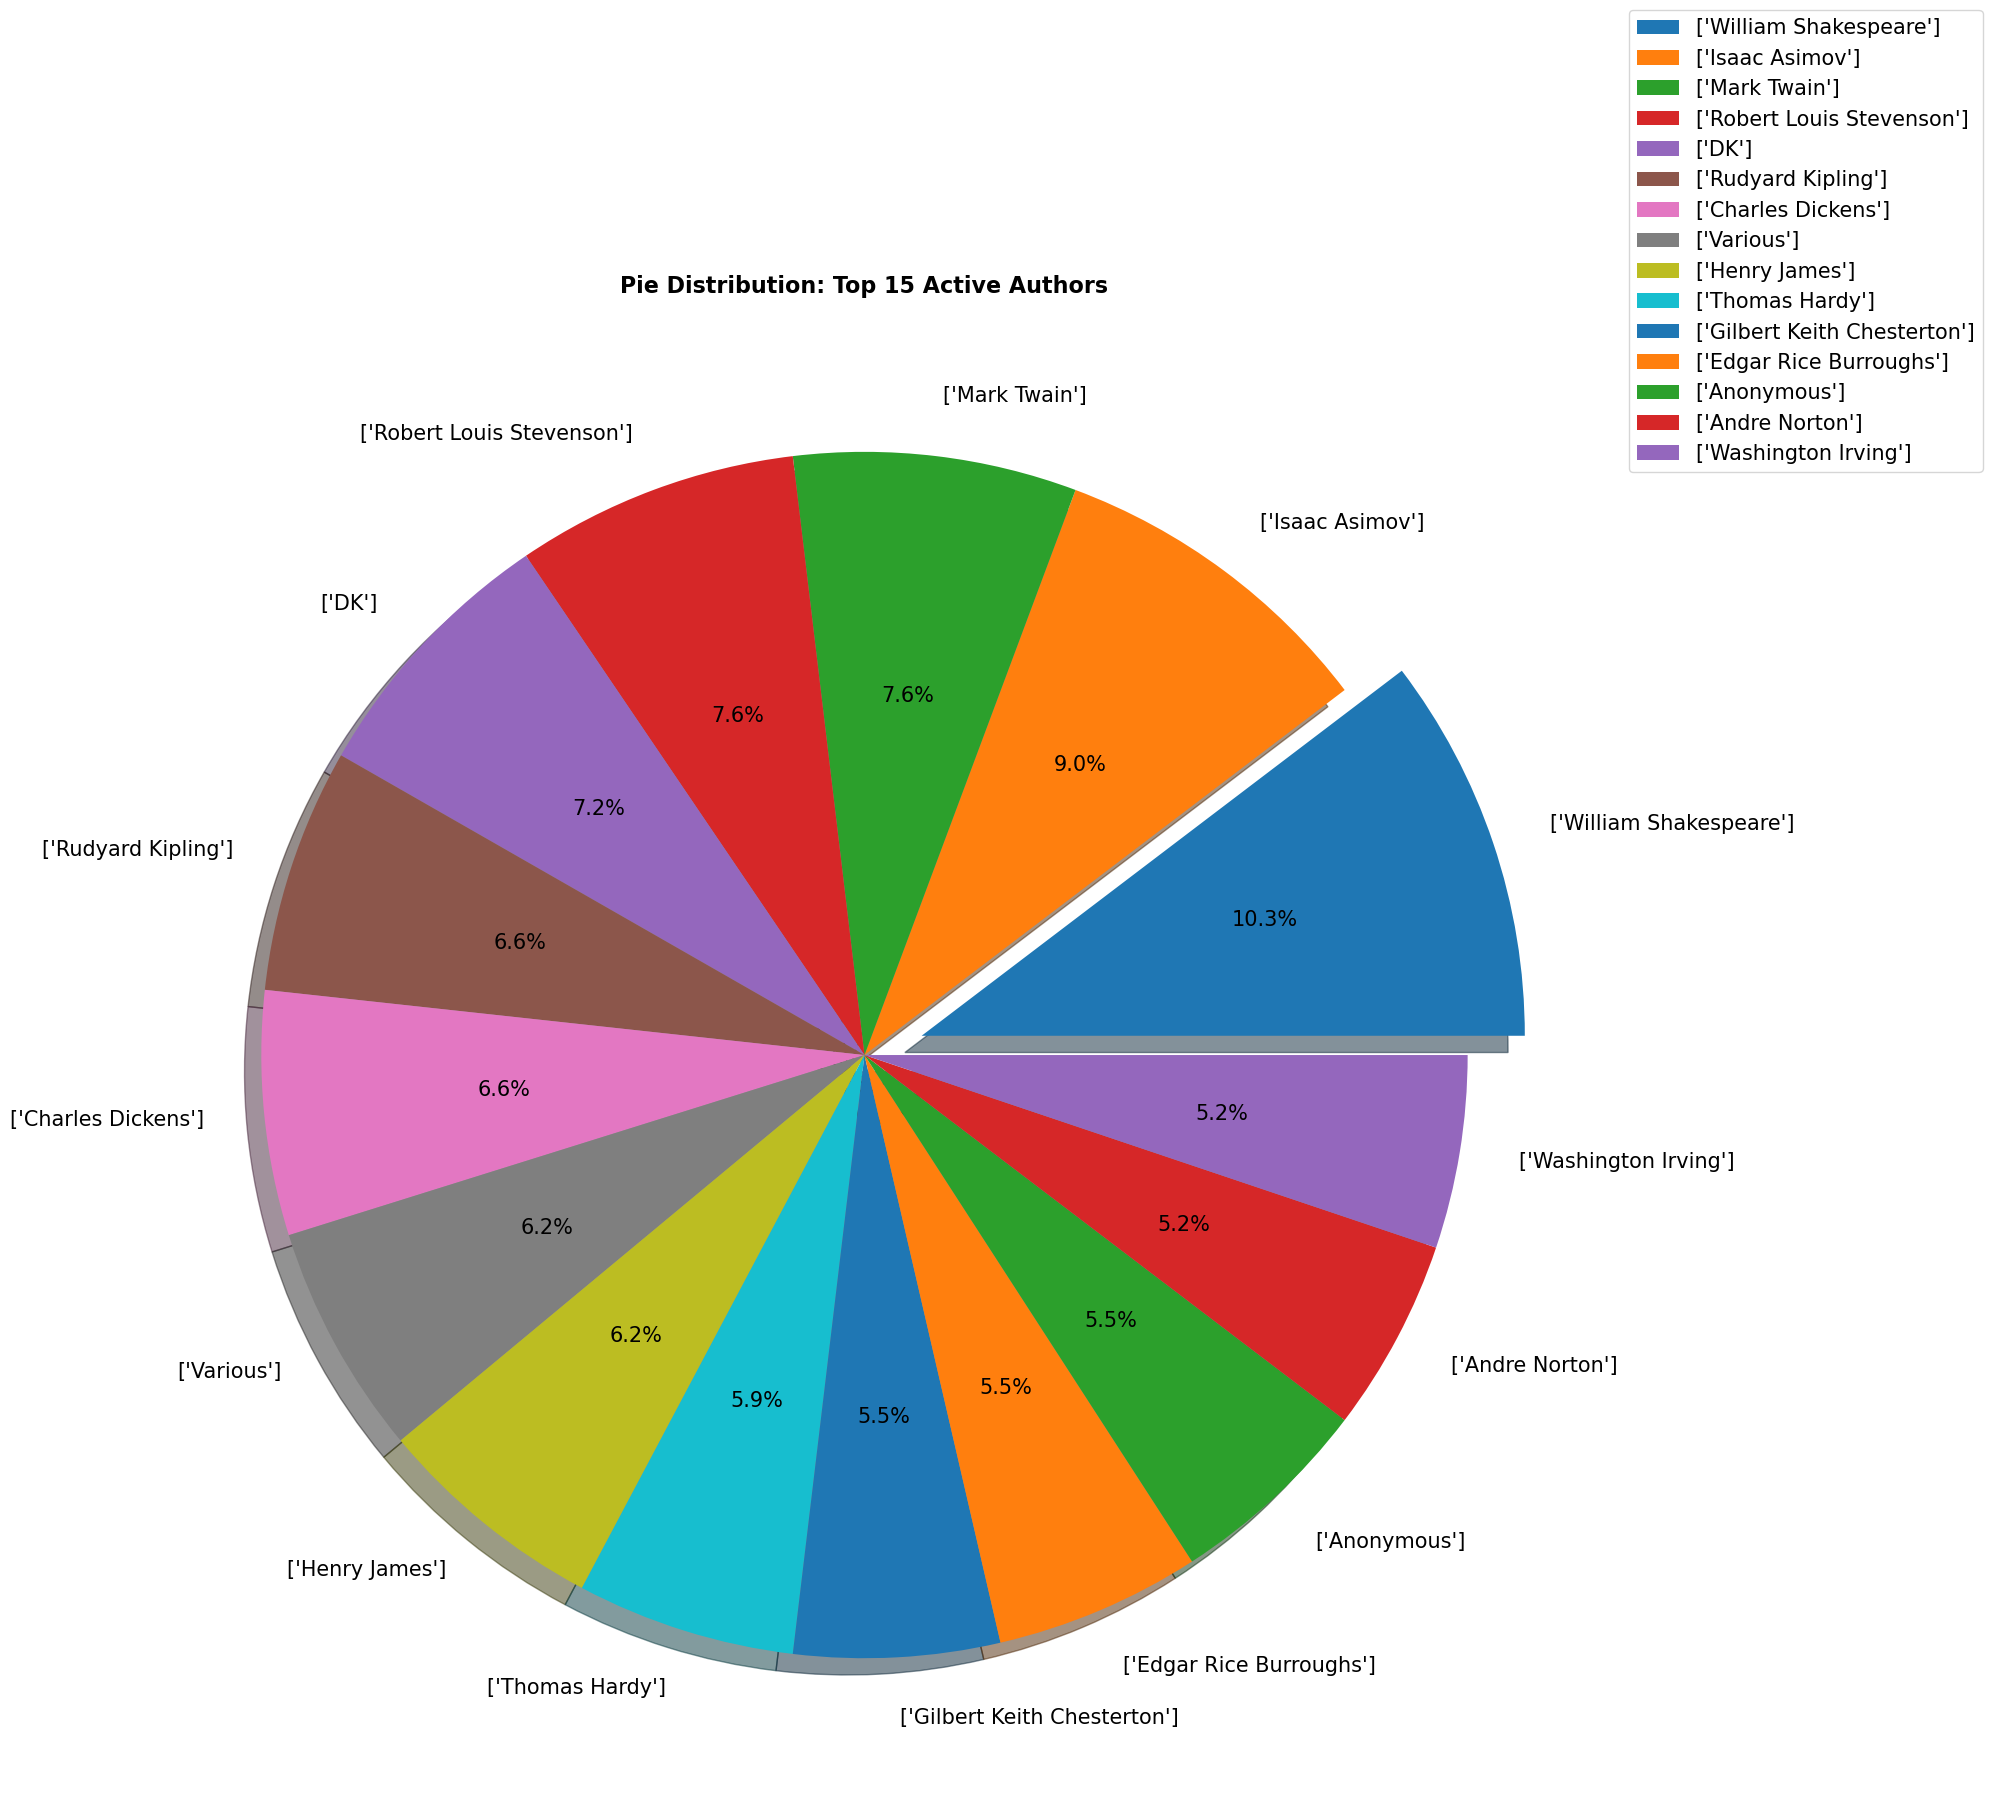

In [232]:
text = "Pie Distribution: Top 15 Active Authors"
df_arg = df_arg.head(15)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = df_arg.keys().map(str)
plt.figure(figsize=(20, 24))

try:
    plt.pie(df_arg, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15})

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.legend(bbox_to_anchor=(1,1.2), loc="upper left", fontsize=15)
    plt.show()
    


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.13 Authors working with multiple genres</span>


In [212]:
author_categories = df_info.groupby('book_author')['categories'].nunique()
df_temp_info = author_categories.to_frame()
df_temp_info['author_categories'] = author_categories
df_temp_info['author_categories']


book_author
["'Abd al-Samih Abu 'Umar"]                                                           0
["'Annah Sobelman"]                                                                   1
["'Jig rten mgon po (('Bri gung chos rje ;)", 'Khenpo Rinpochay Könchok Gyaltsen']    1
["A'isha Ajayi"]                                                                      1
["A. H. Gebhard-L'Estrange"]                                                          1
                                                                                     ..
['생명의말씀사편집부']                                                                         1
['알렉상드르 뒤마(Alexandre Dumas)']                                                         1
['임병균외']                                                                              0
['편집부']                                                                               1
['편집부편']                                                                              1
Name: author_categor

In [213]:
df_arg = author_categories.sort_values(ascending=False)
df_arg


book_author
['William Shakespeare']               30
['Isaac Asimov']                      26
['Mark Twain']                        22
['Robert Louis Stevenson']            22
['DK']                                21
                                      ..
['Margaret E. Baron']                  0
['Margaret Elizabeth Bell']            0
['Margaret Emory']                     0
['Margaret Fairless Barber']           0
['Jonathan Hickman', 'Esad Ribic']     0
Name: categories, Length: 127278, dtype: int64


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.14 Review Dataframe</span>


In [214]:
df_temp_rating.head(25)


,book_price,mean_price
book_title,,
""" Film technique, "" and, "" Film acting """,NaN,NaN
""" We'll Always Have Paris"": The Definitive Guide to Great Lines from the Movies",NaN,NaN
"""... And Poetry is Born ..."" Russian Classical Poetry",NaN,NaN
"""A Titanic hero"" Thomas Andrews, shipbuilder",NaN,NaN
"""A Truthful Impression of the Country"": British and American Travel Writing in China, 1880-1949",70.27,70.27
"""A careless word, a needless sinking"": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II",NaN,NaN
"""A careless word-- a needless sinking"": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II",NaN,NaN
"""A giant in the earth,"": A biography of Dr. J. B. Boddie,",NaN,NaN
"""A kind of life"": Conversations in the combat zone",NaN,NaN


In [215]:
df_temp_info.head(25)


,categories,author_categories
book_author,,
"[""'Abd al-Samih Abu 'Umar""]",0,0
"[""'Annah Sobelman""]",1,1
"[""'Jig rten mgon po (('Bri gung chos rje ;)"", 'Khenpo Rinpochay Könchok Gyaltsen']",1,1
"[""A'isha Ajayi""]",1,1
"[""A. H. Gebhard-L'Estrange""]",1,1
"[""Aaron Ben-Ze'ev"", 'Ruhama Goussinsky']",1,1
"[""Adam I. O'Hirsi""]",1,1
"[""Adam O'Neill""]",1,1
"[""Aimee O'Brian""]",1,1
